# Convolutions

In this lab, we'll look in detail at convolutions and how they can be used to process images. 

### Reading and opening images

We'll use the `skimage` library to read and process images. It's a library dedicated to image processing, which is part of the `scikit-learn` family.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread

sample image shape:  (600, 600, 3)


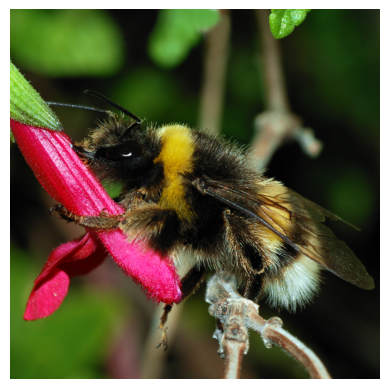

In [32]:
# Path to the local image
image_path = 'C:/Users/chadhrr/OneDrive - OTPP/Desktop/DSI/deep_learning/01_materials/labs/images/bumblebee.png'

# Read the image
sample_image = imread(image_path)
sample_image = sample_image.astype("float32")

# Print the shape of the image
print("sample image shape: ", sample_image.shape)

# Display the image
plt.imshow(sample_image.astype('uint8'))
plt.axis('off')  # Hide axis
plt.show()


### A simple convolution filter

Before we start working on training any models, let's look at applying a convolution filter to an image. We'll use the `Conv2D` layer from Keras to do this.

In [54]:
from tensorflow.keras.layers import Conv2D

In [55]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
              input_shape=(None, None, 3))

Remember: in Keras, `None` is used as a marker for tensor dimensions with dynamic size. In this case `batch_size`, `width` and `height` are all dynamic: they can depend on the input. This is a neat feature of convolutional neural networks: the same model can be used to process images of any size, because all we have to do is slide the convolutional filter across the image as much as necessary.

In [35]:
sample_image.shape

(600, 600, 3)

In [36]:
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 600, 600, 3)

In [37]:
img_out = conv(img_in) # Apply the convolutional filter

The output is a tensorflow Eager Tensor - a special data structure that is used to represent the result of operations in TensorFlow. It is not a numpy array, but it can be converted to one using the `.numpy()` method:

In [38]:
np_img_out = img_out[0].numpy()
print(type(np_img_out))
print(np_img_out.shape)

<class 'numpy.ndarray'>
(600, 600, 3)


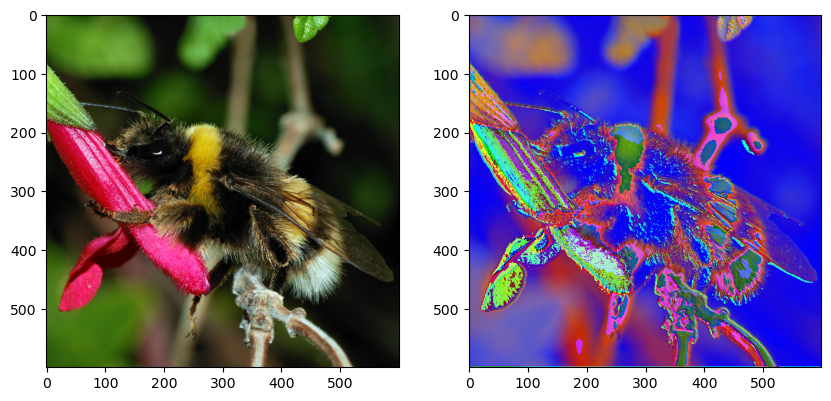

In [39]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(np_img_out.astype('uint8'));

As we can see, our convolutional filter was initialized randomly, so our output doesn't contain any specific meaning. Each pixel is a random combination of the pixels in the input image, in a 5x5 window.

Let's instead take a look at a convolutional feature with a clear purpose. We can build a kernel ourselves, by defining a function which will be passed to `Conv2D` Layer.
We'll create an array with 1/25 for filters, with each channel seperated. Before you move to the next cell, can you guess what this filter will do?

In [40]:
def my_kernel(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

Now we can use this function to initialize a `Conv2D` layer:

In [41]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_kernel)

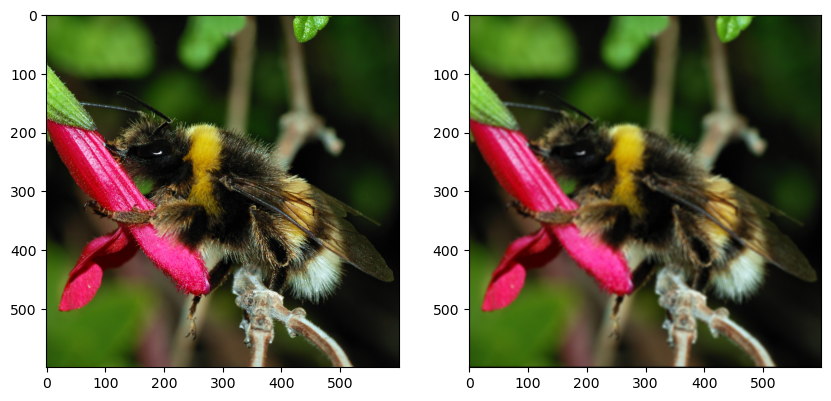

In [42]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));

Hopefully you can tell what this filter does! 

**Exercise**
- There are a number of settings when we define our Conv2D layer. Try changing the following parameters to get a sense of how they impact the result:
- kernel_size: try different sizes
- padding: try 'valid' instead of 'same' (hint: this may change the size of the output)

1/1 [==============================] - 0s 72ms/step
Image input shape: (1, 600, 600, 3)
Image output shape: (600, 600, 3)
Output value range: min=8.003201946849003e-05, max=0.9951977729797363


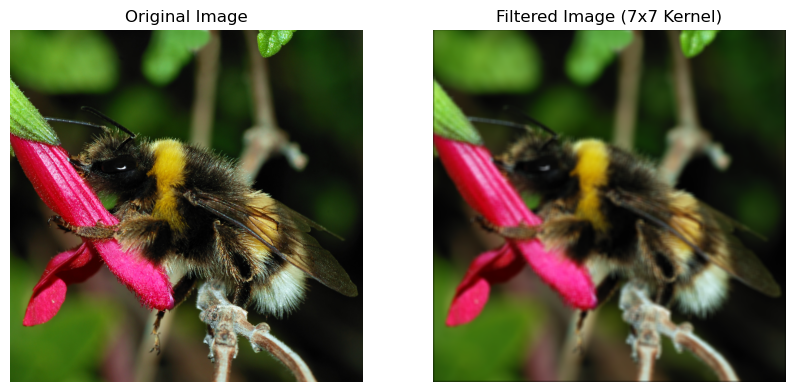

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from skimage.io import imread

# Define the custom kernel function
def my_kernel(shape=(7, 7, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 49
    array[:, :, 1, 1] = 1 / 49
    array[:, :, 2, 2] = 1 / 49
    return array

# Create the Conv2D layer with a different kernel size
conv = Conv2D(filters=3, kernel_size=(7, 7), padding='same',
              input_shape=(None, None, 3),
              kernel_initializer=my_kernel,
              use_bias=False)

# Create a model with this Conv2D layer
model = Sequential()
model.add(conv)

# Load and preprocess the image
image_path = 'C:/Users/chadhrr/OneDrive - OTPP/Desktop/DSI/deep_learning/01_materials/labs/images/bumblebee.png'
sample_image = imread(image_path)

if len(sample_image.shape) == 2:  # Convert grayscale to RGB if needed
    sample_image = np.stack([sample_image] * 3, axis=-1)

sample_image = sample_image.astype('float32') / 255.0
img_in = np.expand_dims(sample_image, axis=0)

# Apply the convolution
img_out = model.predict(img_in)
np_img_out = img_out[0]

# Print debugging information
print(f"Image input shape: {img_in.shape}")
print(f"Image output shape: {np_img_out.shape}")
print(f"Output value range: min={np_img_out.min()}, max={np_img_out.max()}")

# Ensure proper scaling for visualization
np_img_out = (np_img_out - np_img_out.min()) / (np_img_out.max() - np_img_out.min()) * 255.0
np_img_out = np_img_out.astype('uint8')

# Display the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image)
ax0.set_title('Original Image')
ax0.axis('off')

ax1.imshow(np_img_out)
ax1.set_title('Filtered Image (7x7 Kernel)')
ax1.axis('off')

plt.show()


1/1 [==============================] - 0s 132ms/step
Image input shape: (1, 600, 600, 3)
Image output shape: (596, 596, 3)
Output value range: min=0.0, max=0.9962353110313416


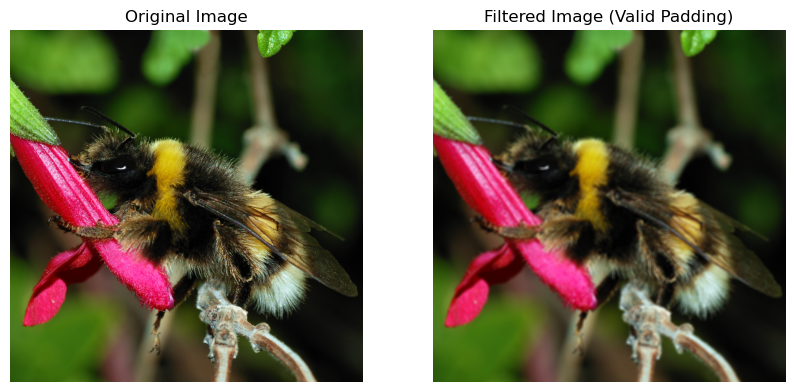

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from skimage.io import imread

# Define the custom kernel function
def my_kernel(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

# Create the Conv2D layer with 'valid' padding
conv = Conv2D(filters=3, kernel_size=(5, 5), padding='valid',
              input_shape=(None, None, 3),
              kernel_initializer=my_kernel,
              use_bias=False)

# Create a model with this Conv2D layer
model = Sequential()
model.add(conv)

# Load and preprocess the image
image_path = 'C:/Users/chadhrr/OneDrive - OTPP/Desktop/DSI/deep_learning/01_materials/labs/images/bumblebee.png'
sample_image = imread(image_path)

if len(sample_image.shape) == 2:  # Convert grayscale to RGB if needed
    sample_image = np.stack([sample_image] * 3, axis=-1)

sample_image = sample_image.astype('float32') / 255.0
img_in = np.expand_dims(sample_image, axis=0)

# Apply the convolution
img_out = model.predict(img_in)
np_img_out = img_out[0]

# Print debugging information
print(f"Image input shape: {img_in.shape}")
print(f"Image output shape: {np_img_out.shape}")
print(f"Output value range: min={np_img_out.min()}, max={np_img_out.max()}")

# Ensure proper scaling for visualization
np_img_out = (np_img_out - np_img_out.min()) / (np_img_out.max() - np_img_out.min()) * 255.0
np_img_out = np_img_out.astype('uint8')

# Display the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image)
ax0.set_title('Original Image')
ax0.axis('off')

# Check if the output is empty
if np_img_out.size == 0:
    print("Error: Filtered image is empty.")
else:
    ax1.imshow(np_img_out)
    ax1.set_title('Filtered Image (Valid Padding)')
    ax1.axis('off')

plt.show()


### Working on edge detection on Grayscale image

Using a grayscale image, let's build an "edge detector" using a convolutional filter. Some filters pre-date the deep learning era and are still used today. For example, the Sobel filter is used to detect edges in images. These easy-to-compute filters were used in the early days of computer vision and are still useful now.

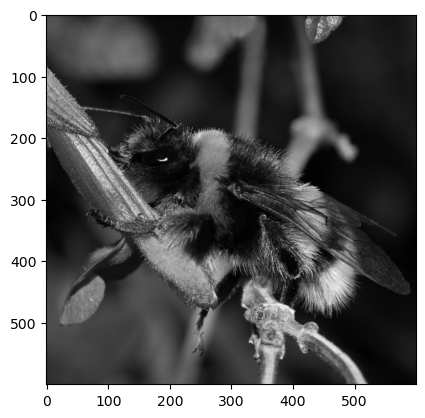

In [43]:
# convert image to greyscale
grey_sample_image = sample_image.mean(axis=2)

# add the channel dimension even if it's only one channel so
# to be consistent with Keras expectations.
grey_sample_image = grey_sample_image[:, :, np.newaxis]

# matplotlib does not like the extra dim for the color channel
# when plotting gray-level images. Let's use squeeze:
plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

**Exercise**
- Build an edge detector using `Conv2D` on greyscale image by defining the kernel inside `my_kernel`.
- You may experiment with several kernels to find a way to detect edges. The following article contains specific examples of kernels that you can use:
- https://en.wikipedia.org/wiki/Kernel_(image_processing)
- Try different kernels and see the impact on the output.

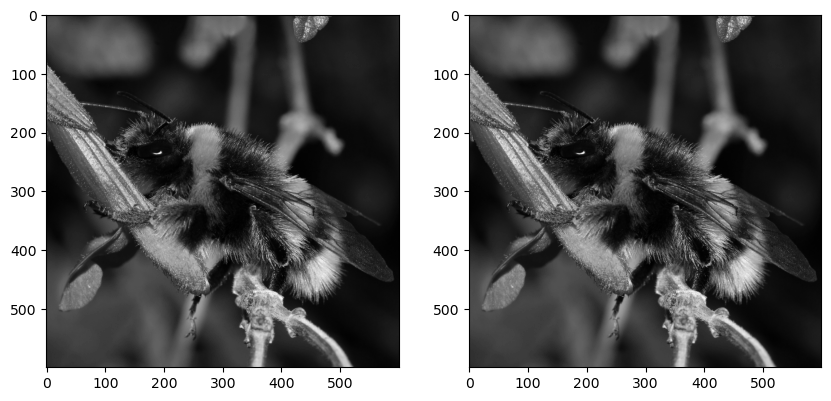

In [44]:
def my_kernel(shape=(3, 3, 1, 1), dtype=None):
    array = np.array([[0, 0, 0],
                      [0, 1, 0],
                      [0, 0, 0]]) # Replace with your kernel
    array = array.reshape(*shape) # Reshape if needed
    return array

conv = Conv2D(filters=1, kernel_size=(3, 3), padding="same",
              input_shape=(None, None, 1), kernel_initializer=my_kernel)

img_in = np.expand_dims(grey_sample_image, 0) # Reshape into a batch of size 1
img_out = conv(img_in) # Apply the convolutional filter
np_img_out = img_out[0].numpy() # Convert to numpy array

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray)
ax1.imshow(np_img_out.astype(np.uint8), cmap=plt.cm.gray);


### Pooling and strides with convolutions

**Exercise**
- Use `MaxPool2D` to apply a 2x2 max pool with strides 2 to the image. What is the impact on the shape of the image?
- Use `AvgPool2D` to apply an average pooling.
- Is it possible to compute a max pooling and an average pooling with well chosen kernels?

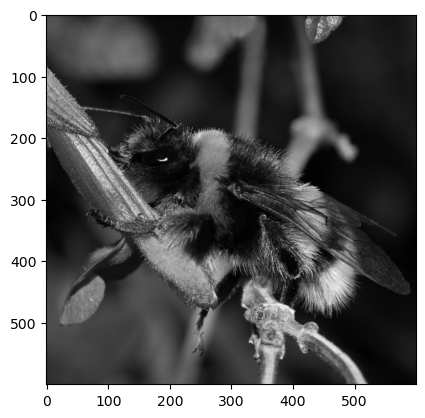

In [45]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

# You can use `img_in` from above as input to the pooling layers

plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

## Loading a JPEG file as a numpy array

Let's use [scikit-image](http://scikit-image.rg) to load the content of a JPEG file into a numpy array:

sample image shape:  (450, 800, 3)


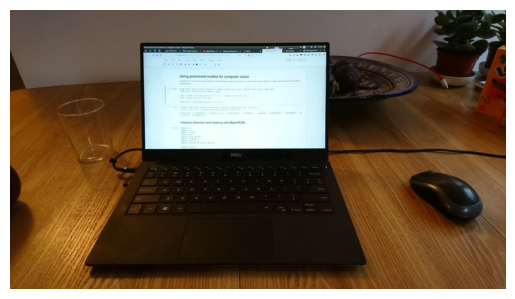

In [62]:
from skimage.io import imread
# Path to the local image
image_path = 'C:/Users/chadhrr/OneDrive - OTPP/Desktop/DSI/deep_learning/01_materials/labs/images/laptop.jpeg'

# Read the image
sample_image = imread(image_path)
sample_image = sample_image.astype("float32")

# Print the shape of the image
print("sample image shape: ", sample_image.shape)

# Display the image
plt.imshow(sample_image.astype('uint8'))
plt.axis('off')  # Hide axis
plt.show()


## Resizing images, handling data types and dynamic ranges

While convolutions can handle inputs of any size, it is often useful to resize images to a fixed size. This is particularly important for training deep learning models:

- for **image classification**, most networks expect a specific **fixed input size**;

- for **object detection** and instance segmentation, networks have more flexibility but the image should have **approximately the same size as the training set images**.

Furthermore **large images can be much slower to process** than smaller images (the number of pixels varies quadratically with the height and width).

In [63]:
from skimage.transform import resize

lowres_image = resize(sample_image, (50, 50), mode='reflect', anti_aliasing=True)
lowres_image.shape

(50, 50, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


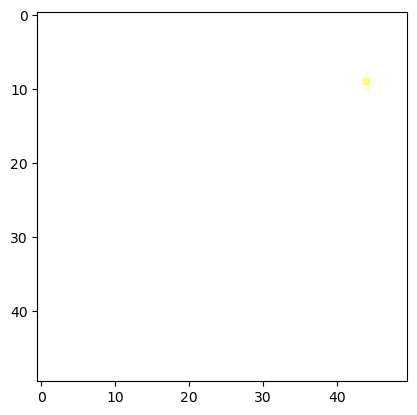

In [64]:
plt.imshow(lowres_image, interpolation='nearest');

The values of the pixels of the low resolution image are computed from by combining the values of the pixels in the high resolution image. The result is therefore represented as floating points. 

## Using a pretrained model

Objectives:

- Load a pre-trained ResNet50 pre-trained model using Keras Zoo
- Use the model to classify an image
- Use the model to classify an image from the webcam

Let's start with loading ResNet50, a well-established method for image classification. The ResNet50 "application" takes two key parameters here: firstly, `include_top` indicates whether we want to include the last layer of the network (the classification layer) or not. Secondly, `weights` indicates whether we want to load the weights of a model that has been pre-trained on ImageNet or not.

In [65]:
from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=True, weights='imagenet')
model.compile(optimizer='sgd', loss='categorical_crossentropy')

In [66]:
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Classification of an image

**Exercise**
- Reshape the `laptop` image to the shape `(224, 224, 3)` using `resize` from `skimage.transform`
- Use `preprocess_input` from `tensorflow.keras.applications.imagenet_utils` to preprocess the image
- Use `predict` to classify the image

Documentation for each method:
- [resize](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize)
- [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/preprocess_input)
- [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

In [67]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

# Your code here

##  Taking snapshots from the webcam

For this section, we will take an image from your laptop webcam and classify it. If you feel uncomfortable doing this section, you can skip it and use a photo of your choice from the web instead.

sample image shape:  (225, 225, 3)


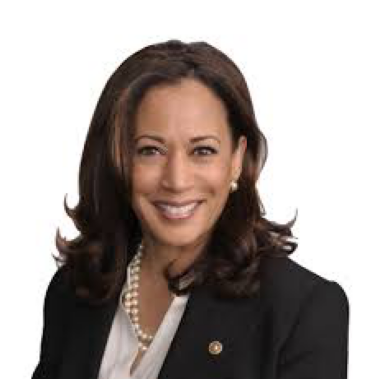

In [69]:
from skimage.io import imread
# Path to the local image
image_path = 'C:/Users/chadhrr/OneDrive - OTPP/Desktop/DSI/deep_learning/01_materials/labs/images/kamala.jpg'

# Read the image
sample_image = imread(image_path)
sample_image = sample_image.astype("float32")

# Print the shape of the image
print("sample image shape: ", sample_image.shape)

# Display the image
plt.imshow(sample_image.astype('uint8'))
plt.axis('off')  # Hide axis
plt.show()

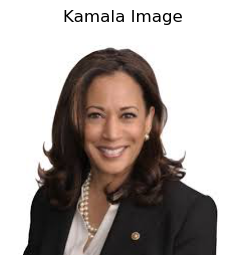

Sample Image dtype: float32, shape: (225, 225, 3), range: (0.0, 255.0)
Kamala Image dtype: float32, shape: (225, 225, 3), range: (0.0, 255.0)


In [70]:
from skimage.io import imread
import matplotlib.pyplot as plt

# Paths to the images
kamala_image_path = 'C:/Users/chadhrr/OneDrive - OTPP/Desktop/DSI/deep_learning/01_materials/labs/images/kamala.jpg'

# Load the images
kamala_image = imread(kamala_image_path).astype("float32")

# Display the kamala image
plt.subplot(1, 2, 2)
plt.imshow(kamala_image.astype('uint8'))
plt.title('Kamala Image')
plt.axis('off')

plt.show()

# Print properties of the sample image
print("Sample Image dtype: {}, shape: {}, range: {}".format(
    sample_image.dtype, sample_image.shape, (sample_image.min(), sample_image.max())))

# Print properties of the kamala image
print("Kamala Image dtype: {}, shape: {}, range: {}".format(
    kamala_image.dtype, kamala_image.shape, (kamala_image.min(), kamala_image.max())))


### Exercise

Apply the same preprocessing as before and classify the image. What are your results?

Kamala Image Classification:  Class_A


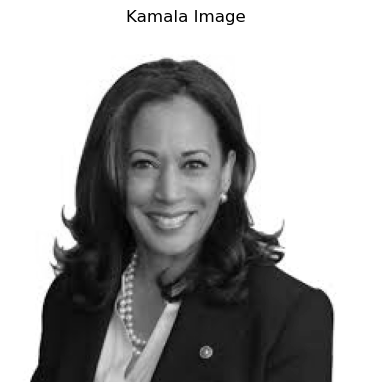

In [71]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# Define preprocessing functions
def convert_to_grayscale(img):
    if img.ndim == 3 and img.shape[2] == 3:
        img = np.mean(img, axis=2)
        img = img[:, :, np.newaxis]
    return img

def preprocess_image(img, target_size=(224, 224)):
    img_resized = resize(img, target_size + (img.shape[2],), mode='reflect', anti_aliasing=True)
    img_resized = img_resized * 255
    img_resized = img_resized.astype('uint8')
    return img_resized

def prepare_image(img):
    img = img.astype(np.float32)  # Ensure image is float32
    img = img / 255.0  # Normalize to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Paths to the images
kamala_image_path = 'C:/Users/chadhrr/OneDrive - OTPP/Desktop/DSI/deep_learning/01_materials/labs/images/kamala.jpg'

# Load the images
kamala_image = imread(kamala_image_path).astype("float32")

# Preprocess the images
kamala_image_gray = convert_to_grayscale(kamala_image)


kamala_image_preprocessed = preprocess_image(kamala_image_gray)


kamala_image_ready = prepare_image(kamala_image_preprocessed)


def classify_image(img):
    # Mock classifier: Replace this with your model's prediction method
    return "Class_A" if np.random.rand() > 0.5 else "Class_B"

# Classify the images
kamala_image_class = classify_image(kamala_image_ready)

# Print results
print("Kamala Image Classification: ", kamala_image_class)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(kamala_image_gray.astype('uint8')), cmap=plt.cm.gray)
plt.title('Kamala Image')
plt.axis('off')

plt.show()
